# Processing images
We are working with MNIST data set. It is built into Keras. The set contains handwritten letters nad digits(see below), but we'll only take digits. Each image is 28 × 28 pixels. Of course there are 10 categories – digits 0 through 9.

The problem: classify grayscale images of handwritten digits

The a set contain of 60,000 training images, plus 10,000 test images, 
Assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.Here are some samples:

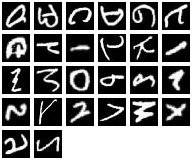

In [7]:
from IPython import display
display.Image("https://i.stack.imgur.com/51MkY.jpg")

First with the dense neural net. Of course as always import libraries 

In [3]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


All libraries are self-evident except for to_categorical from Keras.utils. It takes a vector of integers and converts into positional matrix of classes. Here is the example:

In [4]:
import tensorflow as tf
a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
print(a)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


We first load and display data. Here we are initializing the plot using figure methods, and then create subplots inside using subplot method. Its arguments are number of subplost in terms of columns, number of rows. So the picture here contains 3 sublots vertically and horisontally, using i index. Each subplot will take the index position on a grid with 3 rows and 3 columns. Index starts at 1 in the upper left corner and increases to the right. Method tight_layout automatically adjusts subplot params so that the subplot(s) fits into the figure area. Methods xticks, yticks without argument give current position, with arguments set position. 

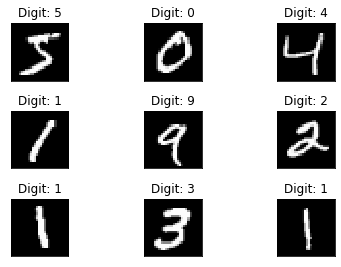

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(train_labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

Plt.clr method clears plot as we do not need it anymore. Now what is the shape, type and type of labels of our data?

In [ ]:
plt.clf()
print(train_images.shape)
print(train_images.dtype)
print(train_labels.dtype)

so it is 3D tensor of 60000 images each being 28× 28 pixels of unsigned 8 bit integers. And labels are also unsigned integers. Thus mnist.load_data() supplies data with structure (60000, 28, 28) i.e. with 2 dimensions per example representing a greyscale image 28x28. FNN does not adapt to images – it sees it as unstructured data- matrix of unrelated sample vectors for which it would expect separate lables. But we don't want it- this is one sample, so, we flatten (reshape) it into 1 dimensional vectors that have labels. This is the best we can do with feedforward network. We then elect 10000 images for training and use the rest for testing. Of coure for classification we onvert labels to categorical -so that they will be vectors to which softmax can compare probabilities when computing loss.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images_val = train_images[:10000]
partial_train_images = train_images[10000:]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels_val = train_labels[:10000]
partial_train_labels=train_labels[10000:]

## Using Shallow FF Network

### Prepare Data
We first convert unsigned integers to float 32: normally we use 32-bit precision when training a neural network when training dense network on iundrelated vectors - it expcets something like regression or classiication on reals, so at one point or another the training data will have to be converted to 32 bit floats. Since the dataset fits easily in RAM, we might as well convert to float immediately. Why do we divide by 255? the input feature's type before the conversion to float32 is byte (unsigned integer 8). Maximum value of the byte is 255, so division by 255 ensures that the input features are normalized, i. e.  scaled between 0.0 and 1.0.

In [ ]:
train_images_val = train_images_val.astype('float32')/255
partial_train_images=partial_train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Now we can create FF dense network as usual. Input shape is a vector (flattened $28\times 28$ pixels). We do shallow network with 512 neurons because it doesn't make sense to try to discover features - we already killed them by flatening. So many layers won't help but just make it to dsciover non-existing relations. Now we can create FF dense network as usual. Input shape is a vector (flattened $28\times 28$ pixels). We do shallow network with 512 neurons because it doesn't make sense to try to discover features - we already killed them by flatening. So many layers won't help but just make it to dsciover non-existing relations.

    -Classifier layer is softmax with 10 outputs (classes); 
    -Gradient descent algorithm modification is rmsprop (always a safe choice, but may not be fastest – will discuss may lectures later)
    - Loss is categorical crossentropy
    - Metric that we’ll be watching during training is accuracy  

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

We are ready to fit the model. Training arguments are input data, number of epochs, size of batch, i.e. it will be stochastic (randomly chosen) mini-batch of 228 images and validation data. It returns object with the same data fields as arguments plus sub-object history (history.history) where all the training data is recorded 

In [ ]:
history=network.fit(partial_train_images,
                    partial_train_labels, epochs=5, batch_size=128,
                    validation_data=(train_images_val, train_labels_val))

History objects contains objects standard objects of loss: history.history.val_loss which contains loss on validation set at every epoch of training and history.hstory.loss which contains loss on training set at every epoch. Whatever parameters we are watching values on training and validation set will also be there. This time it is accuracy. The actual training results of this model are.

In [ ]:
history_dict = history.history
print(history_dict.keys())

We can now plot results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

Finally lets see how the network performs on test data using evaluate method.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Not bad. But can we do better by using more specialized network thta is designed for images.

## Using Convolutional Network
As seen above mnist.load_data() supplies the MNIST digits with structure (60000, 28, 28) i.e. with 2 dimensions per example representing a greyscale image 28x28. CNNs layers are adept in interpreting matrix data as we could see in theory. So this time we prepare data for convolutional layers that take 4 dimensional tensors with axes

### Data preapration 
Convert MNIST data to 4-d tensors with axises:
<ul>
    <li>number of samples</li>
    <li>Horizontal pixels dimension</li>
    <li>Vertical pixels dimension</li>
    <li>Number of color channel</li> 
</ul>
So we reshape data and then separate training, validation and test data. We again convert dtype from byte to reals because convolution works with real numbers! We normalize the real numbers bbecause we want to work with the same range of data 

In [9]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images_val = train_images[:10000]
partial_train_images = train_images[10000:]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels_val = train_labels[:10000]
partial_train_labels=train_labels[10000:]
train_images_val = train_images_val.astype('float32')/255
partial_train_images=partial_train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [10]:
print(train_labels_val.shape)
print(train_images_val.shape)

(10000, 10)
(10000, 28, 28, 1)


We now create CNN model.It’s a stack of Conv2D and MaxPooling2D layers – 2 pairs that end with convolutional layer. Each layer has activation ReLU. The output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions shrink with application of filters. The number of channels (neurons in the layer) is controlled by the first argument passed to the Conv2D layers (32 or 64). So what are all these parameters and layers here?
<ul>
    <li>In convolutional layer second argument specifies the filter size that is in use,</li>
    <li>In MaxPooling2D layer area the argument is the size of the pool (square) from which max value is pooled out. The width and height dimensions shrink with application of pooling</li> 
    <li>The output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels)</li>
    <li>Bias in Conv2D is always initialized to 0, so it is not an argument</li>
    <li>We could sample the output of a layer before feeding it fursther - this is called stride (later). By default no stride, but it can be added with additional argument in Conv2D</li>
<ul>
Main mistery what are channels here. And why 32 or 64?
<ul>
    <li>channels’ are number of different filters applied to the picture, e.g. 32 means 32 different filters are run over the picture</li>
    <li>In Conv2D we can specify how to initialize filters but if you do not then they are initialized uniformly at random</li>
    <li> the number of filters depends on expected numbers of features you expect to aggregate. Typical sized are 32 to 512 with the step of 32. If the picture doesn't have too many features (as in our case you would expect to have narrow levels.</li>
</ul>


In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

After CNN layers we feed results are flattened and then go into dense layers that aggregate features. The last is decision layer that takes a vector (sofmax), so flattening is mandatory. Why insert dense layer between flattening and decision layer? The answer is because we want to couple information that exists vertically as well as horizontally. Results from every neuron of the preceding layers go to every single neuron of the dense layer. So we can say that if the preceding layer outputs a $m\times n$ matrix by combining results from every neuron, this output goes through the dense layer as $m\cdot n$ vector which weighted by dennse layer essentially doing multiple regression on inputs to predict final features forclassification. They are all needed because they are ll initialized differently so they catch different feature of convolutional layer.   

In [ ]:
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))
print(cnn.summary())
cnn.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

As we see with each layer area of coverage of each channel is aggregated, so true window grows to  last convolutional layer output the result of convolutions on a picture split into 9 ($3\times 3$) regions. Thus the first conv layer learns very small features, second learns somewhat aggregated features and last learn the biggest combination. The number of parameters though gwos exponentially fast with adding layers! 

Now train:

In [ ]:
history=cnn.fit(partial_train_images,
                    partial_train_labels, epochs=5, batch_size=64,
                    validation_data=(train_images_val, train_labels_val))

And plot:

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
#plt.figure(1)
fig,axis = plt.subplots(nrows=2, ncols=1)
fig.tight_layout()
plt.subplot(211)
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks([])
plt.yticks([])
plt.subplot(212)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'g^', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

Finally check testing accuracy

In [ ]:
test_loss, test_acc = cnn.evaluate(test_images, test_labels)
print('test_acc:', test_acc)